In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sigtools import *

sample_frequency = 1000
time = np.linspace(0, 2*np.pi, sample_frequency, endpoint=True)

## Signal

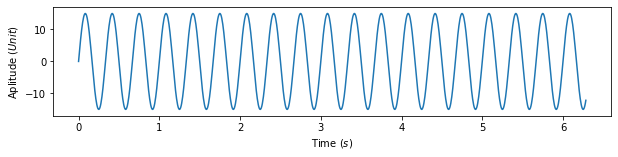

In [10]:
frequency = 3.0
amplitude = 15.0

sig_1 = amplitude * np.sin(2*np.pi * frequency * time) 
plot_signal(sig_1, amplitude+2, sample_frequency)

In [3]:
frequency = 5
amplitude = 10

sig_2 = amplitude * np.sin(2*np.pi * frequency * time) 

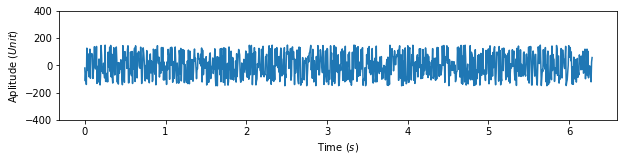

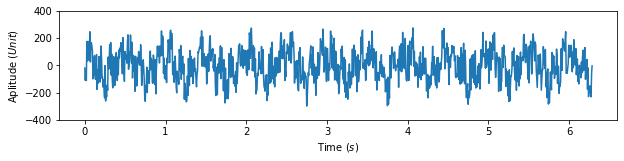

In [28]:
signal = sig_1 * sig_2

noise_level = 300
noise = noise_level * np.random.ranf(len(time)) - noise_level/2

plot_signal(noise, 400, sample_frequency)

signal_noisy = signal + noise
plot_signal(signal_noisy, 400, sample_frequency)

## Discrete Fourier Transform

In [ ]:
fourier_vec = np.fft.fft(sig_1)
plt.plot(fourier_vec.real)

In [ ]:
N = len(fourier_vec) // 2
print("half the lenght =", N)
fourier_vec[N-2 : N+2]

In [ ]:
plt.plot(np.abs(fourier_vec)) # get rid of the imaginary part

Its perfictly mirrored, so lets just take the first part

### Amplitude spectum

In [ ]:
plt.plot(np.abs(fourier_vec[:N]))

## Frequency Spectrum

In [ ]:
delta_t = time[1] - time[0] # 
print("dt = {:.5f}s Sample Time".format(delta_t))

f_a = 1 / delta_t 
print("f_a = {:.2f} Hz Sample Rate".format(f_a))
f_nyquist = f_a / 2
print("f_nyquist = {:.2f} Hz max reconstructable".format(f_nyquist))

In [ ]:
freq_vec = np.linspace(0, f_nyquist, N, endpoint=True)
freq_vec[:4]

In [ ]:
plt.plot(freq_vec, np.abs(fourier_vec[:N]))#
plt.xlabel("Frequency ($Hz$)")

## y-Axis: The Amplitude of the FFT signal

Only using half the fft response, so need to compensate that with a factor of 2.
Also in this FFT implementation the value is normalized with the number of samples. We have to devide by N to get the real physical Value.

In [ ]:
plt.plot(freq_vec, 2 * np.abs(fourier_vec[:N])/N)

# Windowing functions to get periodic signals

In [ ]:
hann = np.hanning(len(signal))
hamm = np.hamming(len(signal))
black = np.blackman(len(signal))

plt.figure(figsize=(8,3))
plt.subplot(131)
plt.plot(hann)
plt.title("Hanning")

plt.subplot(132)
plt.plot(hamm)
plt.title("Hamming")

plt.subplot(133)
plt.plot(black)
plt.title("Blackman")

In [ ]:
plot_signal(hann*sig_2)

In [ ]:
fourier_hann = np.fft.fft(hann*signal)
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(time, signal)
plt.title("Time Domain")
plt.xlabel("Time ($s$)")
plt.ylabel("Amplitude ($Unit$)")

plt.subplot(212)
plt.plot(freq_vec, 2.0*np.abs(fourier_hann[:N])/N)
plt.title("Frequency Domain")
plt.xlabel("Frequency ($Hz$)")
plt.ylabel("Amplitude ($Unit$)")

plt.tight_layout()